In [54]:
# importing required library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns


import datetime as dt
import calendar


In [55]:
# importing the given dataset
df=pd.read_csv('Unemployment_Rate_upto_11_2020.csv')


In [56]:
# updating column names
df.columns=["state","date","frequency","estimated unemployment rate","estimated employed","estimated labour participation rate","region", "longitude", "latitude"]


In [57]:
# seeing head or top values or table
df.head()


,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [58]:
# Number of rows and columns in the data set
df.shape


(267, 9)

In [59]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   state                                267 non-null    object 
 1   date                                 267 non-null    object 
 2   frequency                            267 non-null    object 
 3   estimated unemployment rate          267 non-null    float64
 4   estimated employed                   267 non-null    int64  
 5   estimated labour participation rate  267 non-null    float64
 6   region                               267 non-null    object 
 7   longitude                            267 non-null    float64
 8   latitude                             267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [60]:

df.describe()


,estimated unemployment rate,estimated employed,estimated labour participation rate,longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [61]:

# Checking for the Null values
df.isnull().sum()


state                                  0
date                                   0
frequency                              0
estimated unemployment rate            0
estimated employed                     0
estimated labour participation rate    0
region                                 0
longitude                              0
latitude                               0
dtype: int64

In [62]:

df.state.value_counts()


Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: state, dtype: int64

In [63]:
# creating a new column for month

df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['month_int'] =  df['date'].dt.month
df['month'] =  df['month_int'].apply(lambda x: calendar.month_abbr[x])
df.head()


,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude,month_int,month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


In [64]:
# Numeric data grouped by months

IND =  df.groupby(["month"])[['estimated unemployment rate', "estimated employed", "estimated labour participation rate"]].mean()
IND = pd.DataFrame(IND).reset_index()
IND = round(IND,2)
IND

,month,estimated unemployment rate,estimated employed,estimated labour participation rate
0,Apr,22.24,10570199.00,35.30
1,Aug,10.31,14429042.04,42.39
2,Feb,9.27,15488266.04,44.18
3,Jan,9.20,15637199.77,44.63
4,Jul,9.83,14418021.48,42.27
5,Jun,10.91,13857393.81,41.20
6,Mar,10.78,14538659.89,43.75
7,May,23.24,11507394.85,39.65
8,Oct,8.03,14579980.52,41.44
9,Sep,8.71,14587838.63,41.97


In [65]:
df.state.unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [66]:
df.region.unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [67]:
df.groupby("region").size()

region
East         40
North        79
Northeast    38
South        60
West         50
dtype: int64

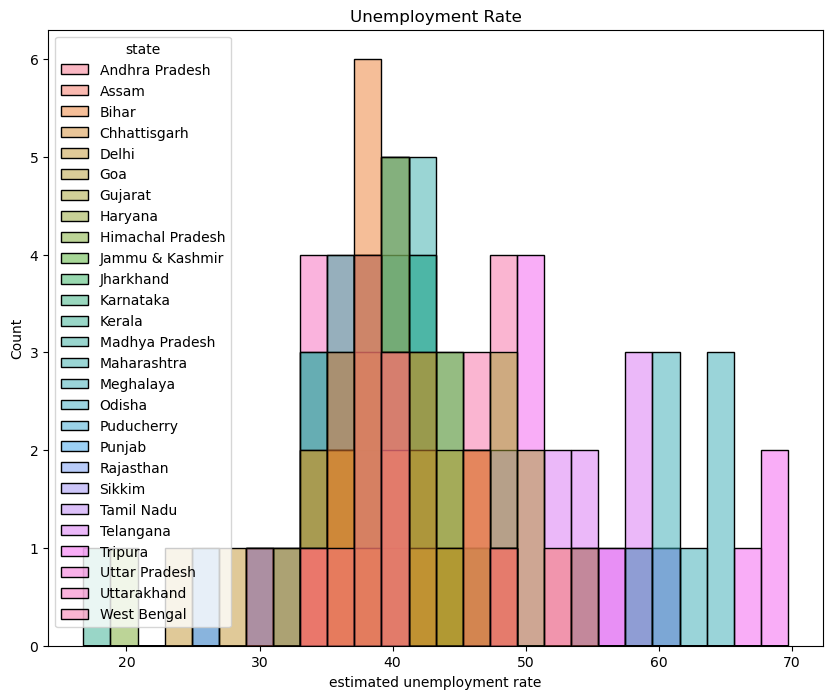

In [68]:
#unemployment rate according to different regions of India

df.columns=["state","month_int","month","date","frequency","estimated unemployment rate","estimated employed","estimated labour participation rate","region", "longitude", "latitude"]
plt.figure(figsize=(10, 8))
plt.title("Unemployment Rate")
sns.histplot(x="estimated unemployment rate", hue="state", data=df)
plt.show()


In [69]:

state = df.groupby(["state"])[["estimated unemployment rate", "estimated employed", "estimated labour participation rate"]].mean()
state = pd.DataFrame(state).reset_index()
state = round(state,1)
state

C:\Users\sheraz\AppData\Local\Temp\ipykernel_2556\2638283217.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,state,estimated unemployment rate,estimated labour participation rate
0,Andhra Pradesh,39.0,15.9
1,Assam,43.5,26.2
2,Bihar,37.2,25.1
3,Chhattisgarh,41.2,21.3
4,Delhi,35.9,28.7
5,Goa,39.2,15.3
6,Gujarat,45.5,22.3
7,Haryana,42.1,29.1
8,Himachal Pradesh,40.3,31.1
9,Jammu & Kashmir,37.9,33.8


In [70]:
# average unemployment rate bar plot
fig = px.bar(state, x='state', y="estimated unemployment rate", color="state", title="Average unemploment Rate (State)")
fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.show()


In [71]:
# Box plot

fig = px.box(df,x='state',y='estimated unemployment rate',color='state',title='Unemployment rate')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


In [72]:
# average unemployment rate bar plot
fig = px.bar(state, x='state', y="estimated unemployment rate", color="state", title="Average unemploment Rate (State)")
fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.show()


In [73]:
region= df.groupby(["region"])[["estimated unemployment rate", "estimated employed", "estimated labour participation rate"]].mean()
region = pd.DataFrame(region).reset_index()
region =round(region,0)
region

C:\Users\sheraz\AppData\Local\Temp\ipykernel_2556\612244170.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,region,estimated unemployment rate,estimated labour participation rate
0,71.0,45.0,22.0
1,74.0,39.0,15.0
2,74.0,41.0,27.0
3,75.0,40.0,31.0
4,76.0,42.0,18.0
5,76.0,42.0,29.0
6,76.0,33.0,11.0
7,77.0,38.0,34.0
8,77.0,36.0,29.0
9,77.0,40.0,31.0


In [74]:
# Average Unemployment Rate

fig = px.bar(region, x="region", y="estimated unemployment rate", color="region", title="Average Unemployment Rate (Region)")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


In [75]:
unemployment= df.groupby(["state"])[[ "estimated employed", "estimated labour participation rate","region"]].mean()
unemployment = pd.DataFrame(unemployment).reset_index()
unemployment= round(unemployment,0)
unemployment

C:\Users\sheraz\AppData\Local\Temp\ipykernel_2556\2960632240.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,state,estimated labour participation rate,region
0,Andhra Pradesh,16.0,80.0
1,Assam,26.0,93.0
2,Bihar,25.0,85.0
3,Chhattisgarh,21.0,82.0
4,Delhi,29.0,77.0
5,Goa,15.0,74.0
6,Gujarat,22.0,71.0
7,Haryana,29.0,76.0
8,Himachal Pradesh,31.0,77.0
9,Jammu & Kashmir,34.0,77.0


In [76]:
unemployment = df[["state", "region", "estimated unemployment rate"]]

fig = px.sunburst(unemployment, path=['region','state'], values='estimated unemployment rate',
                  title= 'Unemployment rate in every state and region', height=650)
fig.show()